In [1]:
#Importing key libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

In [5]:
f = open('/Users/Raafe/Desktop/SteverNovember.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])
data.columns=['Time','Power','Temperature']
data1=data

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data1['Temperature'] = pd.to_numeric(data1['Temperature'], errors='coerce')
data1['Power'] = pd.to_numeric(data1['Power'], errors='coerce')
data1['Time']=pd.to_datetime(data1['Time'],errors='coerce')

In [16]:
data1=data.set_index('Time',drop=False)
data1.dtypes
data2=data1.drop(data1.columns[0],axis=1)
data3=data2.resample('H').mean()
data4=data3.interpolate()
data5=data4.resample('D').mean()
df=data5

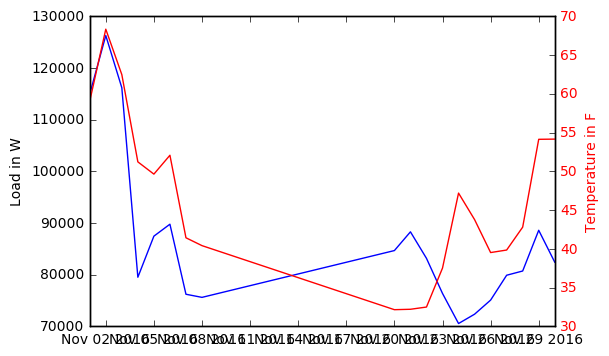

In [17]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df.Power)
ax1.set_ylabel('Load in W')

ax2 = ax1.twinx()
ax2.plot(df.Temperature, 'r-')
ax2.set_ylabel('Temperature in F', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

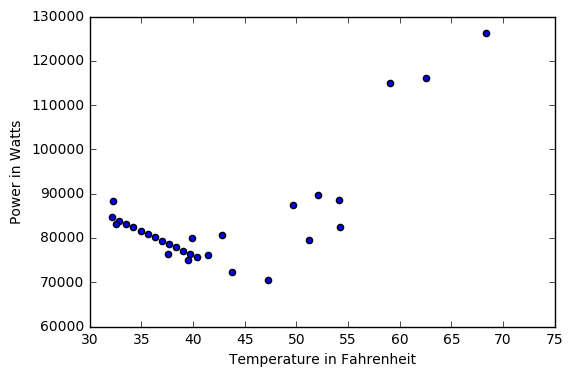

In [18]:
plt.scatter(df.Temperature,df.Power)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Power in Watts')

In [ ]:
from sklearn import preprocessing